In [89]:
import pandas as pd

In [90]:
frame = pd.read_csv('../script/frame.csv')

In [91]:
frame.head().T

,0,1,2,3,4
y,7.489146e+06,7.489146e+06,7.489146e+06,7.489146e+06,7.489146e+06
x,5.801403e+06,5.801203e+06,5.801003e+06,5.800803e+06,5.800603e+06
r,NaN,NaN,NaN,NaN,NaN
g,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN
lon,2.084072e+01,2.084072e+01,2.084073e+01,2.084073e+01,2.084074e+01
lat,5.234595e+01,5.234415e+01,5.234236e+01,5.234056e+01,5.233876e+01


In [92]:
frame.shape

(20250, 7)

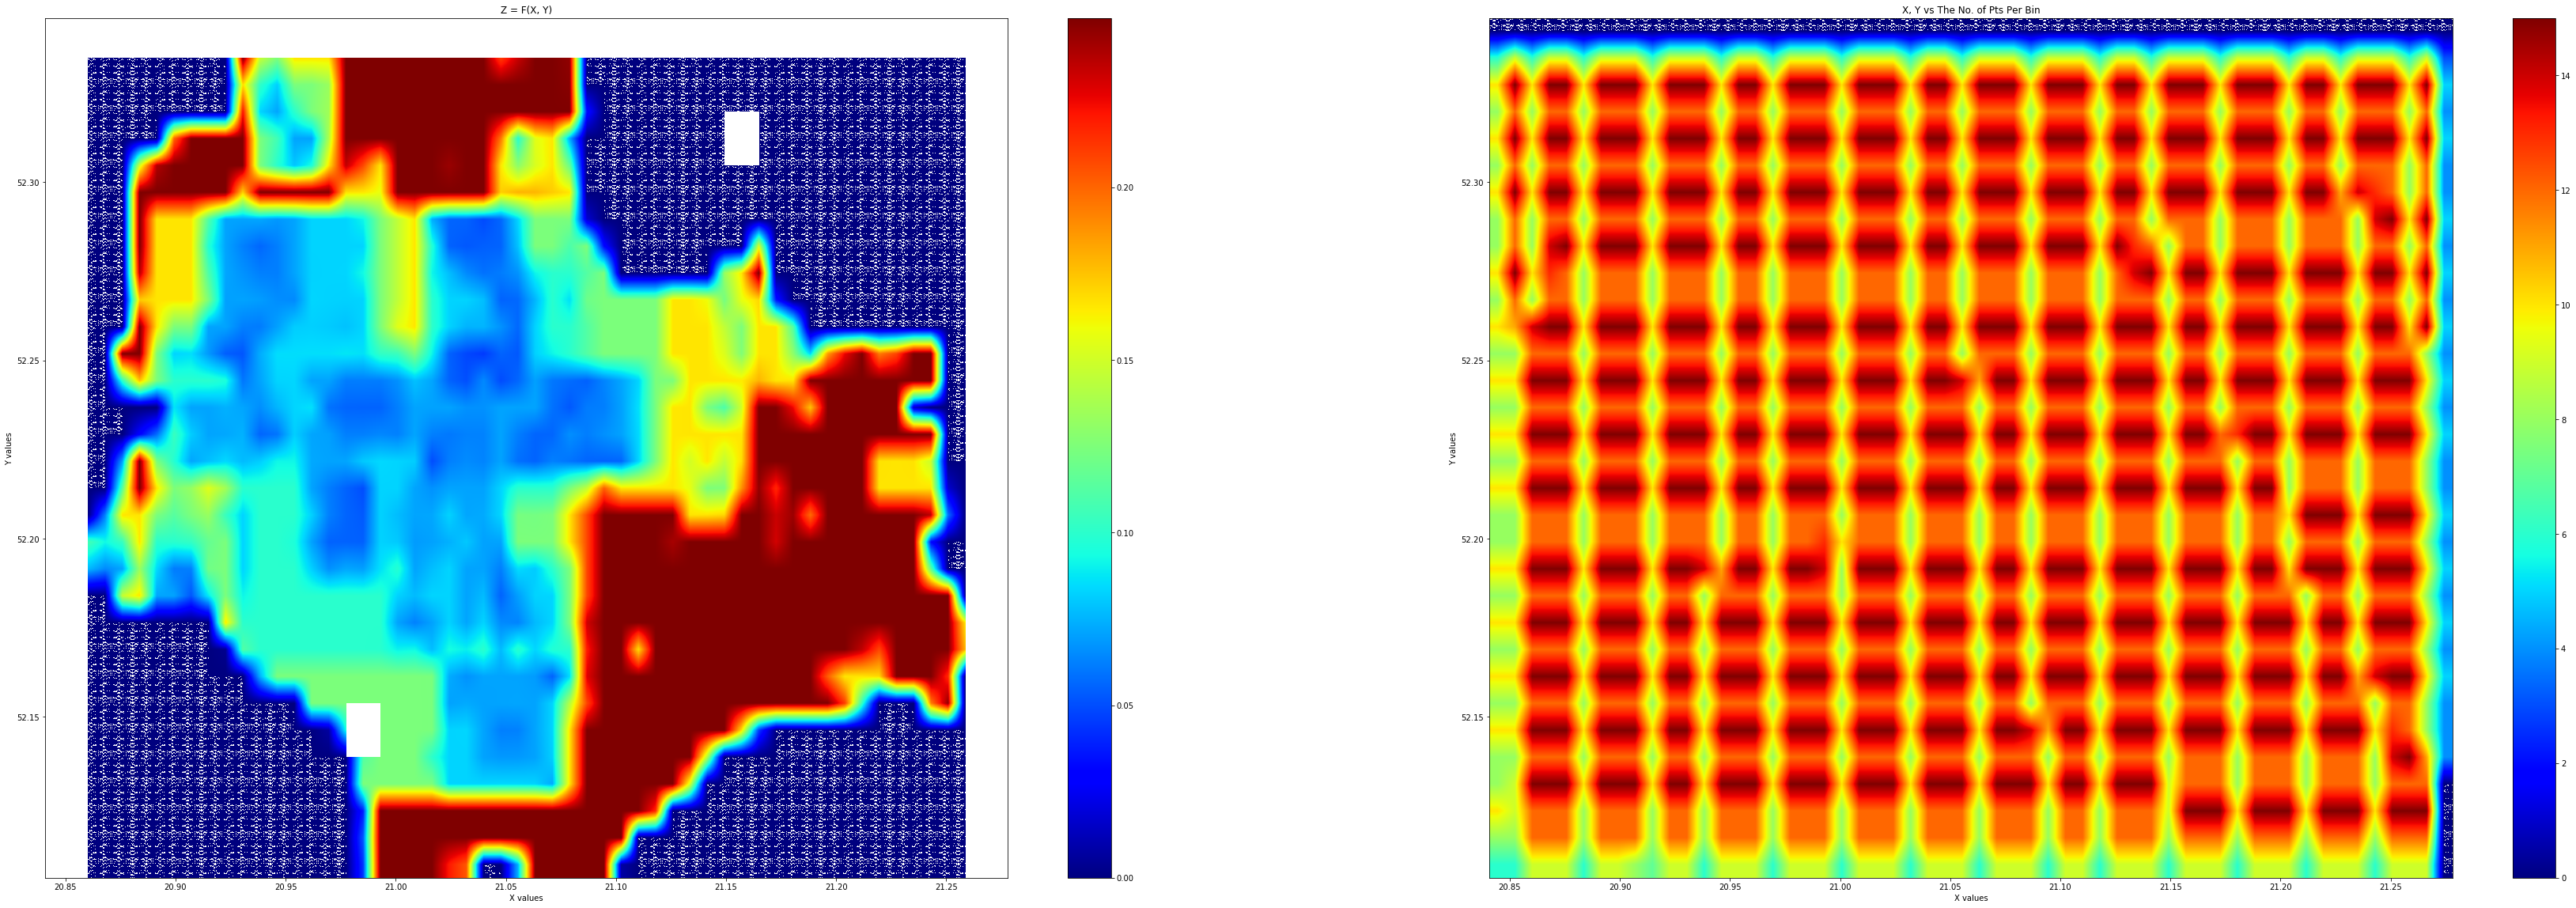

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import griddata

                         # the total number of data points.
x = frame['lon']         # create some normally distributed dependent data in x.
y = frame['lat']          # ... do the same for y.
z = frame['b']

# plot some profiles / cross-sections for some visualization.  our
# function is a symmetric, upward opening paraboloid z = x**2 + y**2.
# We expect it to be symmetric about and and y, attain a minimum on
# the origin and display minor Gaussian noise.

plt.rcParams["figure.figsize"] = [60,20]
plt.ion()   # pyplot interactive mode on

# x vs z cross-section.  notice the noise.
plt.plot(x, z, '.')
plt.title('X vs Z=F(X,Y=constant)')
plt.xlabel('X')
plt.ylabel('Z')

# y vs z cross-section.  notice the noise.
plt.plot(y, z, '.')
plt.title('Y vs Z=F(Y,X=constant)')
plt.xlabel('Y')
plt.ylabel('Z')

# now show the dependent data (x vs y).  we could represent the z data
# as a third axis by either a 3d plot or contour plot, but we need to
# grid it first....
plt.plot(x, y, '.')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

# enter the gridding.  imagine drawing a symmetrical grid over the
# plot above.  the binsize is the width and height of one of the grid
# cells, or bins in units of x and y.
binsize = 0.008
grid, bins, binloc = griddata.griddata(x, y, z, binsize=binsize)  # see this routine's docstring


# minimum values for colorbar. filter our nans which are in the grid
zmin    = grid[np.where(np.isnan(grid) == False)].min()
zmax    = grid[np.where(np.isnan(grid) == False)].max()

# colorbar stuff
palette = plt.matplotlib.colors.LinearSegmentedColormap('jet3',plt.cm.datad['jet'],2048)
palette.set_under(alpha=0.0)

# plot the results.  first plot is x, y vs z, where z is a filled level plot.
extent = (x.min(), x.max(), y.min(), y.max()) # extent of the plot
plt.subplot(1, 2, 1)
plt.imshow(grid, extent=extent, cmap=palette, origin='lower', vmin=zmin, vmax=zmax, aspect='auto', interpolation='bilinear')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Z = F(X, Y)')
plt.colorbar()

# now show the number of points in each bin.  since the independent data are
# Gaussian distributed, we expect a 2D Gaussian.
plt.subplot(1, 2, 2)
plt.imshow(bins, extent=extent, cmap=palette, origin='lower', vmin=0, vmax=bins.max(), aspect='auto', interpolation='bilinear')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X, Y vs The No. of Pts Per Bin')
plt.colorbar()


In [101]:
blue_grid = grid

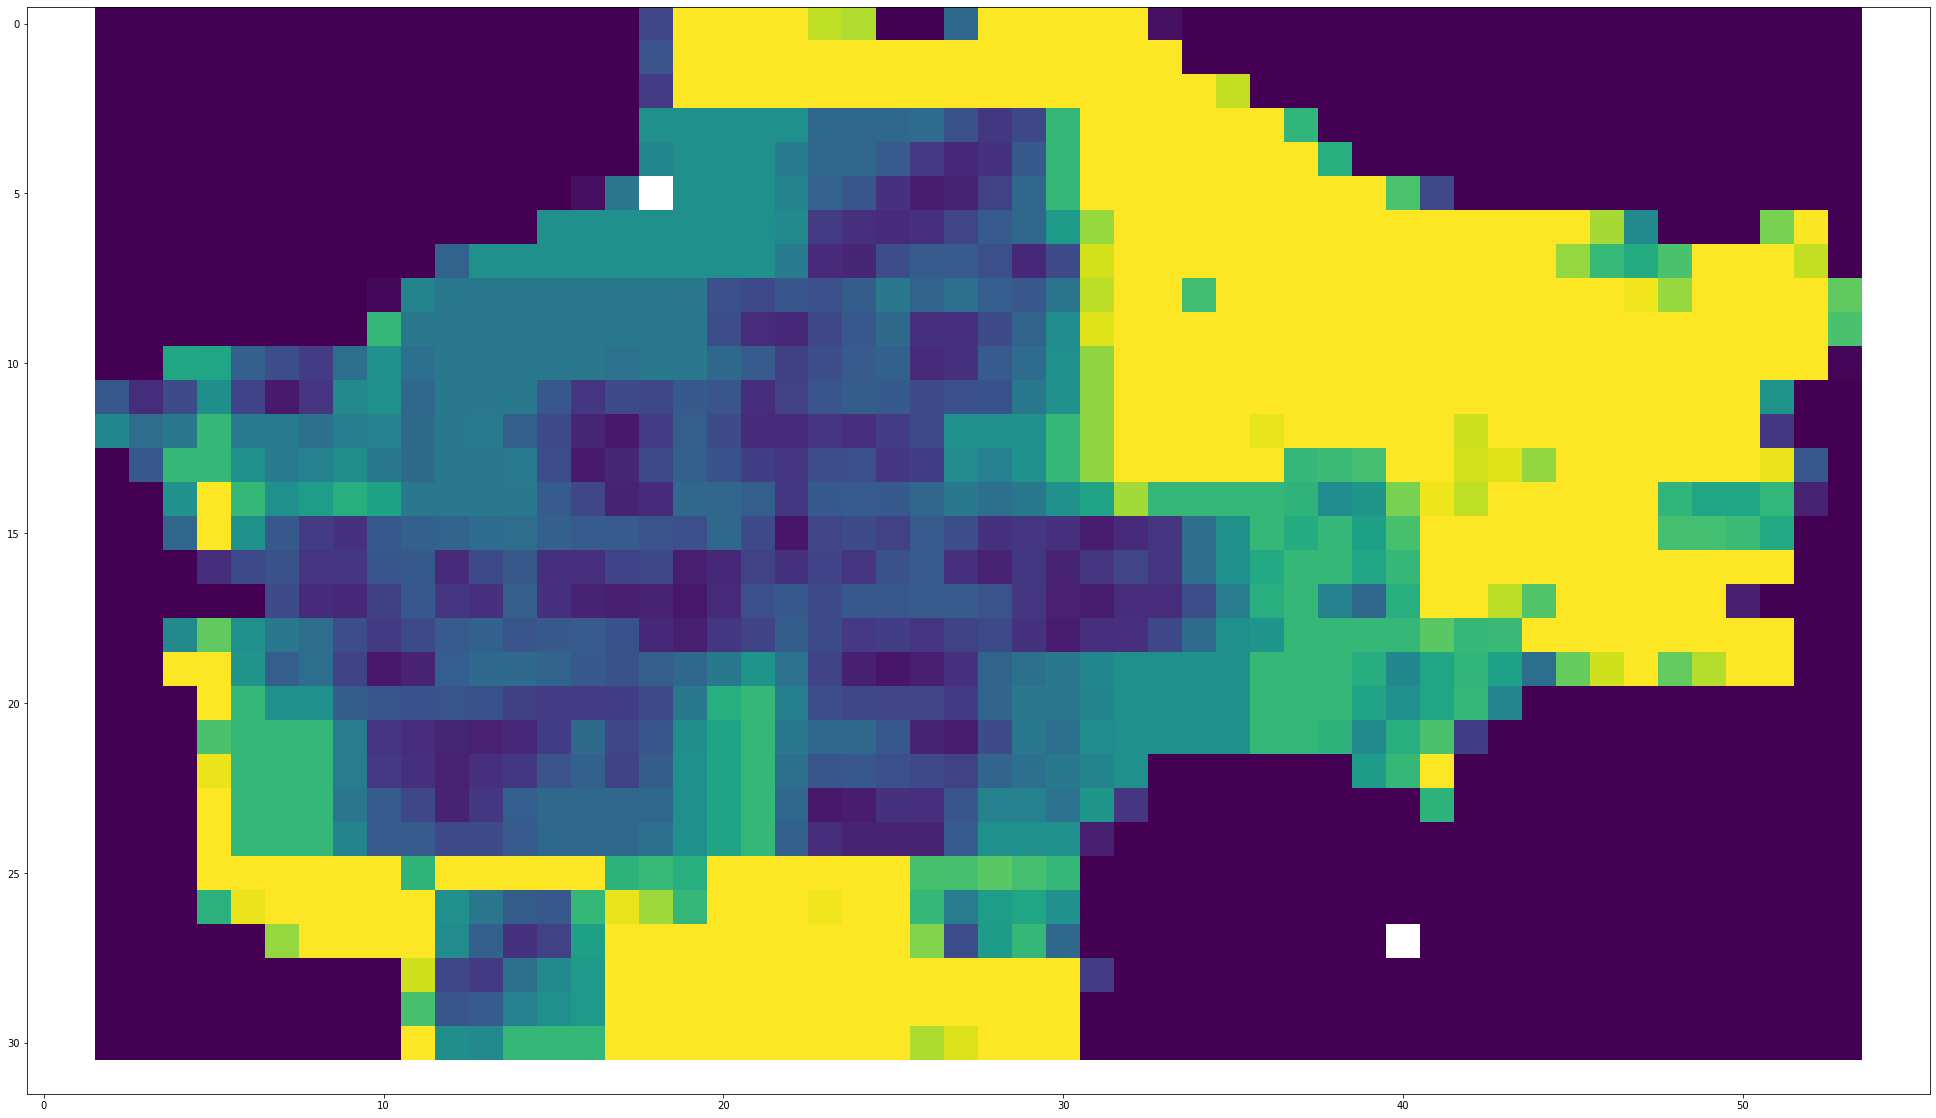

In [103]:
plt.imshow(red_grid+blue_grid+green_grid)